## Data Analysis and Preprocessing 

In this notebook we will:
1. Analyse dataset
    - Download dataset from here: [Click to download!](https://docs.google.com/spreadsheets/d/1fRNebu-9wWT_dOfAqAiMd_rkE1XWtmmv/edit#gid=1300201471)
    - Download the dataset and put it into the dataset folder.
2. Preprocess and save it for later use (will be used in other notebooks)

### Loading dataset

#### imports

In [7]:
# install necessary modules first
# !pip install wordcloud

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from pathlib import Path
from tqdm import tqdm

from bs4 import BeautifulSoup
from time import time
from typing import Union, List, Set, Tuple
from wordcloud import WordCloud, STOPWORDS

import warnings
warnings.filterwarnings("ignore")

#### loading clustering.xlsx data

In [2]:
dataset_path = Path("../dataset/clustering.xlsx")
dataset = pd.read_excel(open(dataset_path,"rb"))
dataset = dataset[["Text"]]
# header of the dataset
dataset.head()

,Text
0,"Moeller's student-run newspaper, The Crusader,..."
1,"In 2008, The Crusader won First Place, the sec..."
2,The Squire is a student literary journal that ...
3,Paul Keels - play-by-play announcer for Ohio S...
4,Joe Uecker - Ohio State Senator (R-66) .


#### no.of datapoints

In [3]:
dataset.shape

(46117, 1)

#### A few samples data points

In [4]:
for i in range(5):
    print(dataset["Text"].iloc[i])
    print("-"*30)

Moeller's student-run newspaper, The Crusader, is consistently recognized as being one of the top in the region.
------------------------------
In 2008, The Crusader won First Place, the second-highest honor a high school newspaper can receive from the American Scholastic Press Association [REF].
------------------------------
The Squire is a student literary journal that features stories, poems, and essays written by Moeller students.
------------------------------
Paul Keels - play-by-play announcer for Ohio State University football and basketball on WBNS-FM .
------------------------------
Joe Uecker - Ohio State Senator (R-66) .
------------------------------


#### Visualize the word Occurences using WordCloud

In [5]:
# !pip install wordcloud

In [9]:
stopwords = set(STOPWORDS)
words = ''
for sentence in tqdm(dataset["Text"]): # for each sentence
    # joining all sentences into single variable called words
    sentence = sentence + ' ' # adding space at the end of sentence.
    words += "".join(sentence)+""
# words

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 46117/46117 [01:16<00:00, 603.31it/s]


In [11]:
def plot_wordcloud(
    words:str, 
    stopwords:Union[List, Set], 
    title:str="wordcloud", 
    width:int=1200, 
    height:int=1000,
    background_color:str="white",
    min_font_size:int=5,
    figsize:Tuple[int,int]=(10,10),
    )->None:
    """
    this method plot wordclouds for the given words

    Parameters
    ----------
    words: str
        Collection of all the words present in the dataset.
        Words should be separated by space in the single string format(not List or any)
    stopwords: Union(Set, List)
        List or Set of stopwords
    title: str
        title for the plot
    width: int
        width (in pixels) of the the WordCloud plot/image
    height: int
        height (in pixels) of the WordCloud plot/image
    background_color: str
        background color for the WordCloud image/plot
    min_font_size: int
        minimum font size to be included in the WordCloud plot
    figsize: tuple(int,int)
        figure size for the plotting
    """
    wordcloud = WordCloud(width=1200, height=1000,
    background_color='white',
    stopwords = stopwords,
    min_font_size = 3
    ).generate(words)
    plt.figure(figsize=figsize, facecolor=None)
    plt.imshow(wordcloud)
    plt.axis(False)
    plt.tight_layout(pad=0)
    plt.title(title)
    plt.show()

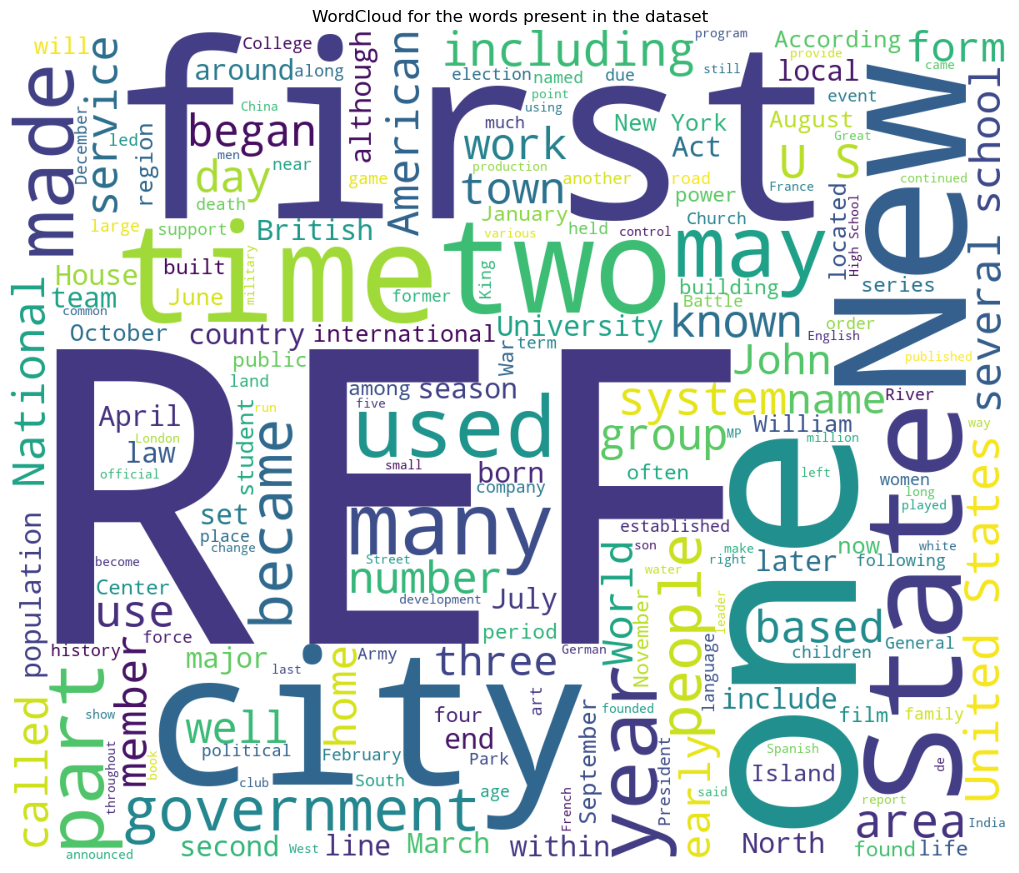

In [12]:
plot_wordcloud(words=words, stopwords=stopwords, title="WordCloud for the words present in the dataset")

### Data(Text) Preprocessing

Before getting the feature Vector of the sentences, We will preprocess the text.

Hence, in the Preprocessing phase we will do the following in the order below:

1. Begin by removing the html tags (if any).
2. Remove any punctuations or limited set of special characters like `,` or `.` or `#` etc.
3. Check if the word is made up of English letters.
4. Changing the whole corpus into lowercase.
    [NOTE: But there are a few acronyms also used. So, we can treate it as an hyperparameter. means whether to change into lowercase or not.]
5. Remove stopwords.
6. Finally WordNetLemmatizer is used to get root word (NOTE: Stemming is faster than Lemmatization)

NOTE: We have dedicated notebook ran on lemmatized dataset.

#### Decontracting words
like: 
- `won't` --> will not
- `n't` --> not
- `'ll` --> will
- `etc.`

In [45]:
import re
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

#### Stopwords

In [46]:
# !pip install nltk

In [47]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\modassir\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [57]:
# stopwords = set(nltk.corpus.stopwords.words("english"))
stopwords= set(['br','ref',"not", 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 're', \
            've', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

#### Text preprocessing function


In [58]:
import re
def text_preprocessing(sentence):
    sentence = re.sub(r"http\S+","",sentence)
    sentence = BeautifulSoup(sentence, "html.parser").get_text()
    sentence = decontracted(sentence)
    sentence = re.sub("\S*\d\S*", "", sentence).strip()
    sentence = re.sub('[^A-Za-z0-9=+-]+', " ", sentence)
    sentence = " ".join(e.lower() for e in sentence.split() if e.lower() not in stopwords)
    return sentence

### Preprocess dataset

In [59]:
t0 = time()
preprocessed_dataset = pd.DataFrame()
preprocessed_dataset["Text"] = dataset["Text"].apply(text_preprocessing)
print(f"time taken to preprocess the dataset: {time()-t0}")

time taken to preprocess the dataset: 16.110597133636475


In [60]:
preprocessed_words = ''
for sentence in preprocessed_dataset["Text"]:
    sentence += " "
    preprocessed_words += "".join(sentence)
# preprocessed_words

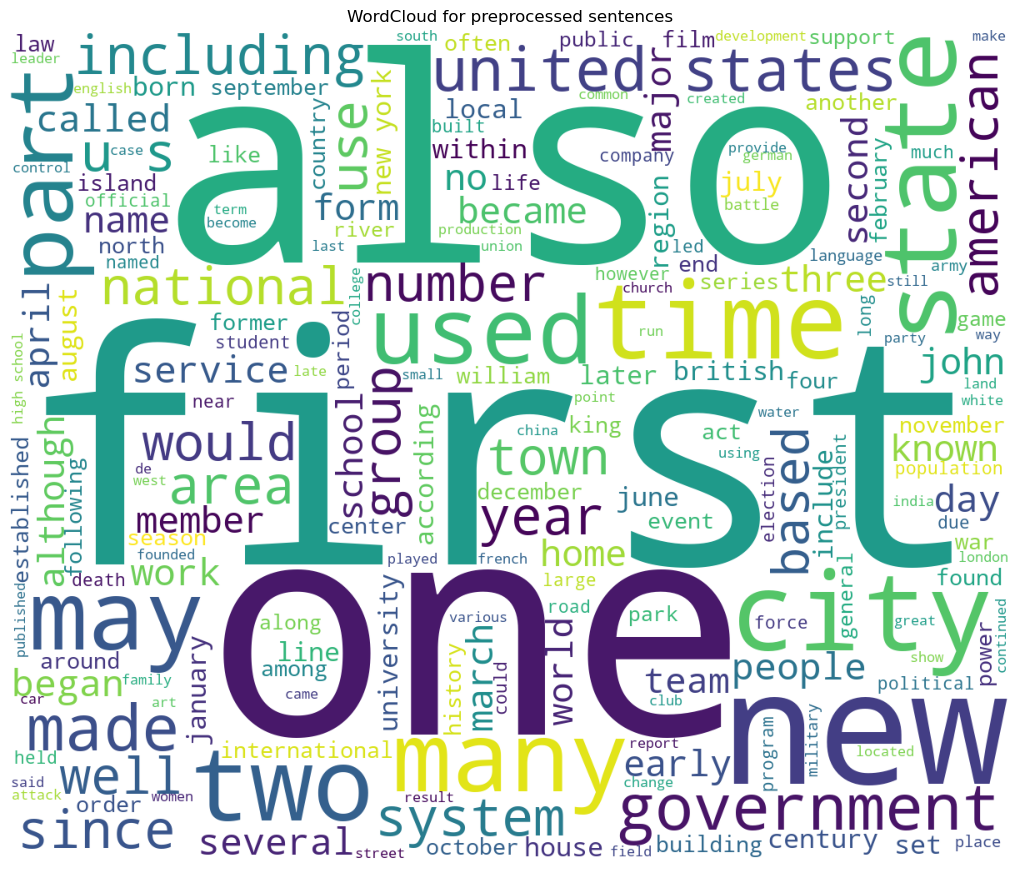

In [61]:
plot_wordcloud(words=preprocessed_words, stopwords=stopwords, title="WordCloud for preprocessed sentences")

### Saving the preprocessed dataset

In [62]:
preprocessed_dataset_path = Path(dataset_path.parent/"preprocessed_data.csv")
preprocessed_dataset.to_csv(str(preprocessed_dataset_path), index=None)

In [63]:
# validating whether file has saved or not
temp = pd.read_csv(preprocessed_dataset_path)
temp.head()

,Text
0,moeller student-run newspaper crusader consist...
1,crusader first place second-highest honor high...
2,squire student literary journal features stori...
3,paul keels - play-by-play announcer ohio state...
4,joe uecker - ohio state senator


In [66]:
temp.iloc[54:60]

,Text
54,savings + taxes + imports = investment + gover...
55,s + t + m = + g + x
56,s + t + m + g + x
57,effects disequilibrium vary according equation...
58,s + t + m + g + x levels income output expendi...
59,s + t + m + g + x levels income expenditure ou...


In [67]:
dataset.iloc[54:60]

,Text
54,Savings + Taxes + Imports = Investment + Gover...
55,S + T + M = I + G + X.
56,S + T + M ≠ I + G + X .
57,The effects of disequilibrium vary according t...
58,"If S + T + M > I + G + X the levels of income,..."
59,"S + T + M > I + G + X the levels of income, ex..."


__Summary:__
- Dataset contains around 46K datapoints
- We used wordcloud to plot the most frequent words in the dataset.
- TF-IDF will take care of most frequent words. So, no need to worry about it.